# CA2 - Supervised machine learning classification pipeline - applied to medical data
### Jony Karmakar

### Important information

- Do __not__ use scikit-learn (`sklearn`) or any other high-level machine learning library for this CA
- Explain your code and reasoning in markdown cells or code comments
- Label all graphs and charts if applicable
- If you use code from the internet, make sure to reference it and explain it in your own words
- If you use additional function arguments, make sure to explain them in your own words
- Use the classes `Perceptron`, `Adaline` and `Logistic Regression` from the library `mlxtend` as classifiers (`from mlxtend.classifier import Perceptron, Adaline, LogisticRegression`). _Always_ use the argument `minibatches=1` when instantiating an `Adaline` or `LogisticRegression` object. This makes the model use the gradient descent algorithm for training. Always use the `random_seed=42` argument when instantiating the classifiers. This will make your results reproducible.
- You can use any plotting library you want (e.g. `matplotlib`, `seaborn`, `plotly`, etc.)
- Use explanatory variable names (e.g. `X_train` and `X_train_scaled` for the training data before and after scaling, respectively)
- The dataset is provided in the file `fetal_health.csv` in the `assets` folder

### Additional clues

- Use the `pandas` library for initial data inspection and preprocessing
- Before training the classifiers, convert the data to raw `numpy` arrays
- For Part IV, you are aiming to create a plot that looks similar to this:
<img src="./assets/example_output.png" width="300">

### Additional information

- Feel free to create additional code or markdown cells if you think it will help you explain your reasoning or structure your code (you don't have to).


## Part I: Data loading and data exploration

### Import necessary libraries/modules:

In [12]:
# Importing Libaries
# ======================
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.classifier import Perceptron, Adaline, LogisticRegression

### Loading and exploring data

1. Load the dataset `fetal_health.csv` with `pandas`. Use the first column as the row index.
2. Check for missing data, report on your finding and remove samples with missing data, if you find any.
3. Display the raw data with appropriate plots/outputs and inspect it. Describe the distributions of the values of feature `"baseline value"`, `"accelerations"`, and the target variable `"fetal_health"`.
4. Will it be beneficial to scale the data? Why or why not?
5. Is the data linearly separable using a combination of any two pairs of features? Can we expect an accuracy close to 100% from a linear classifier?

In [6]:
# Loading the dataset 
# ======================
df = pd.read_csv('/Users/jony/DAT200/assignment/CA2-1/assets/fetal_health.csv', index_col=0)

In [14]:
#Cheking for missing data
# =======================
null_counts = df.isnull().sum().sum()
print(f'Total Null values: {null_counts}' )

Total Null values: 0


There is no missing values in this dataset

## Raw Inspection of the dataset

In [15]:
# Showing the information about dataset
# =====================================
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, 1584 to 2124
Data columns (total 9 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1290 non-null   float64
 1   accelerations                                           1290 non-null   float64
 2   prolongued_decelerations                                1290 non-null   float64
 3   abnormal_short_term_variability                         1290 non-null   float64
 4   mean_value_of_short_term_variability                    1290 non-null   float64
 5   percentage_of_time_with_abnormal_long_term_variability  1290 non-null   float64
 6   histogram_mean                                          1290 non-null   float64
 7   histogram_variance                                      1290 non-null   float64
 8   fetal_health                             

In [16]:
# Statistical information about each column of the dataset
# ========================================================
df.describe()

baseline value  accelerations  prolongued_decelerations  \
count     1290.000000    1290.000000               1290.000000   
mean       133.868217       0.002657                  0.000231   
std         10.093266       0.003681                  0.000719   
min        106.000000       0.000000                  0.000000   
25%        127.000000       0.000000                  0.000000   
50%        133.000000       0.001000                  0.000000   
75%        142.000000       0.004000                  0.000000   
max        160.000000       0.019000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      1290.000000                           1290.000000   
mean                         49.758915                              1.278682   
std                          17.770759                              0.916280   
min                          12.000000                              0.200000   
25%                          34.000000                              0.600000   
50%                          53.000000                              1.100000   
75%                          63.000000                              1.700000   
max                          87.000000                              6.900000   

       percentage_of_time_with_abnormal_long_term_variability  histogram_mean  \
count                                        1290.000000          1290.000000   
mean                                           12.637984           133.982946   
std                                            21.033866            17.140582   
min                                             0.000000            73.000000   
25%                                             0.000000           124.000000   
50%                                             0.000000           136.000000   
75%                                            17.000000           146.000000   
max                                            91.000000           182.000000   

       histogram_variance  fetal_health  
count         1290.000000   1290.000000  
mean            19.710078      0.362016  
std             32.399245      0.480770  
min              0.000000      0.000000  
25%              1.000000      0.000000  
50%              6.000000      0.000000  
75%             24.000000      1.000000  
max            269.000000      1.000000

## Visual Inspection of the dataset

#### Histograms

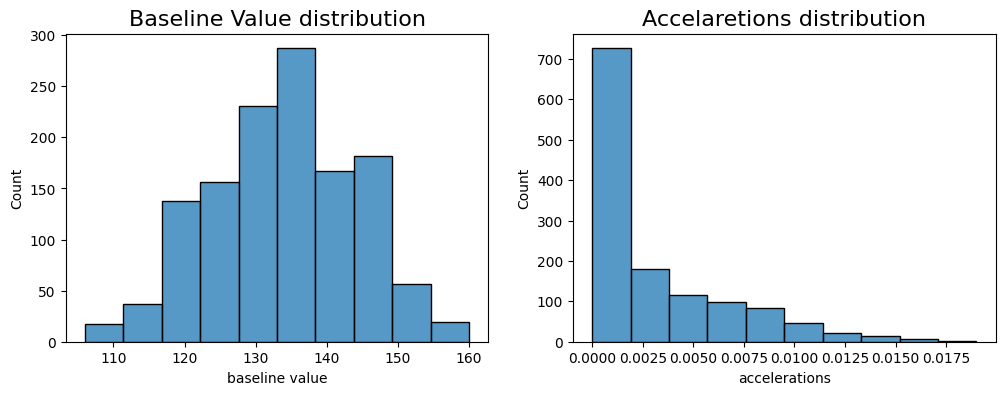

In [18]:
# Numerical histogram distribution of 'baseline value' and 'accelaretion with sns.histplot
# ========================================================================================
var_title_dict = {'baseline value'                 : 'Baseline Value distribution', 
                  'accelerations'                 : 'Accelaretions distribution'}

fig, axes = plt.subplots(1,2,figsize=(12,4))

for idx, var in enumerate(list(var_title_dict.keys())):
    sns.histplot(data=df[var], ax=axes[idx], bins=10)
    axes[idx].set_title(var_title_dict[var], fontsize=16)

plt.show()

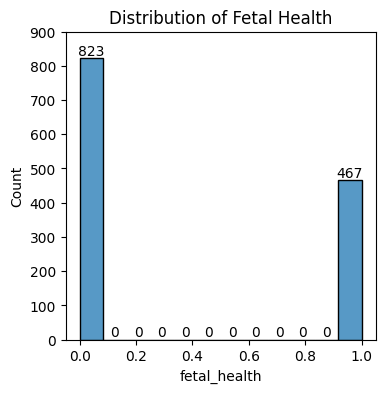

In [22]:
# Histogram distribution of the target variable 'fetal_health' with sns.barplot
# =============================================================================
fig, axes = plt.subplots(1,1,figsize=(4,4))
sns.histplot(data=df, x='fetal_health', ax=axes)

axes.set_title('Distribution of Fetal Health')
axes.set_ylim([0, 900])

# Code for putting the count of the bar on top
for p in axes.patches:
    height = p.get_height()
    position_x = p.get_x() + p.get_width() / 2
    axes.text(position_x, height, f'{height}', ha='center', va='bottom', fontsize=10)

plt.show()

#### Box and Whisker Plots

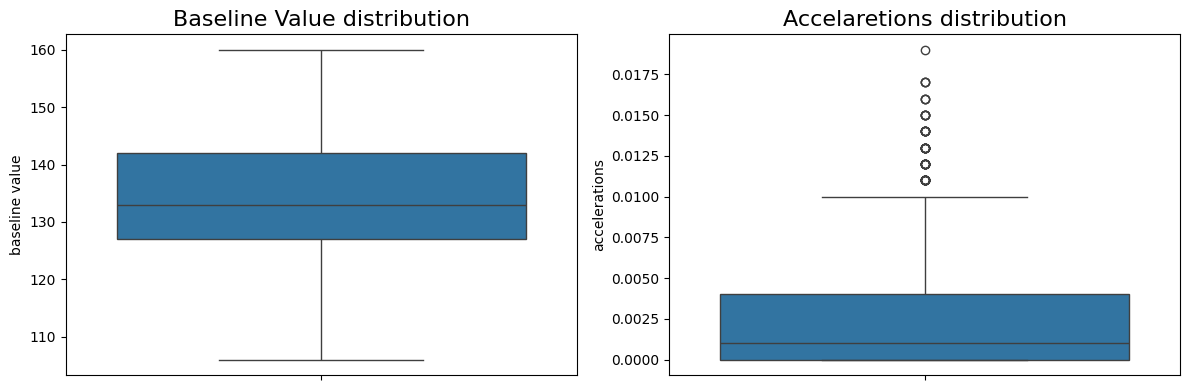

In [47]:
# Density distribution with sns.kdeplot
fig, axes = plt.subplots(1,2,figsize=(12,4))

for idx, var in enumerate(list(var_title_dict.keys())):
    sns.boxplot(data=df[var], ax=axes[idx])
    axes[idx].set_title(var_title_dict[var], fontsize=16)

fig.tight_layout()
plt.show()

#### Violin Plots

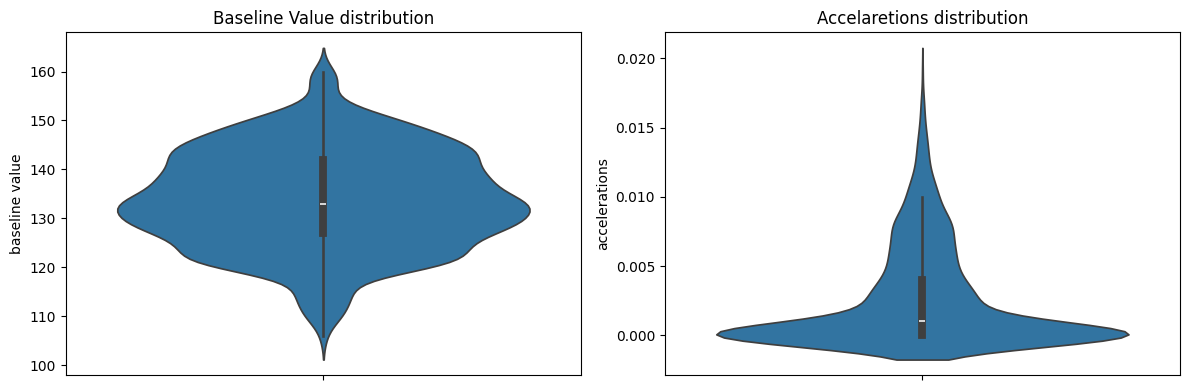

In [32]:
# Density distribution with sns.violinplot
fig, axes = plt.subplots(1,2,figsize=(12,4))

for idx, var in enumerate(list(var_title_dict.keys())):
    sns.violinplot(data=df, y=var, ax=axes[idx])
    axes[idx].set_title(var_title_dict[var])

fig.tight_layout()
plt.show()

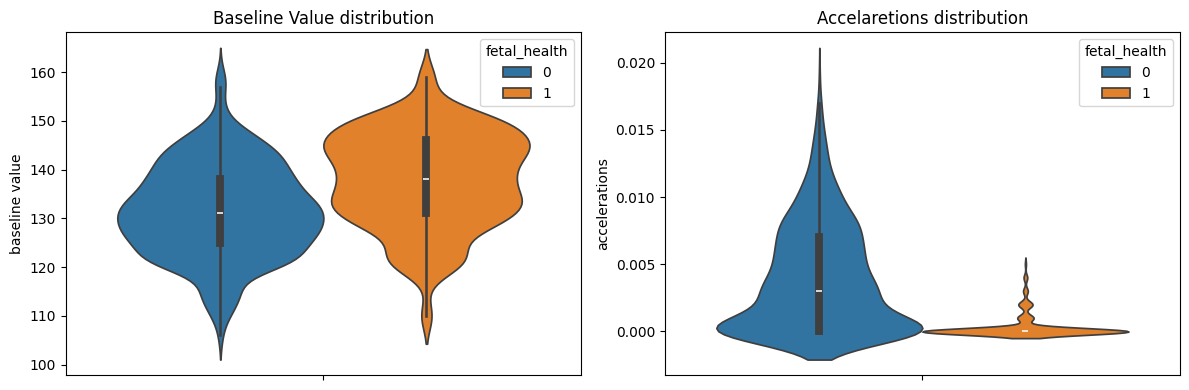

In [34]:
# Density distribution with sns.kdeplot
fig, axes = plt.subplots(1,2,figsize=(12,4))

for idx, var in enumerate(list(var_title_dict.keys())):
    sns.violinplot(data=df, y=var, ax=axes[idx], hue='fetal_health')
    axes[idx].set_title(var_title_dict[var])

fig.tight_layout()
plt.show()

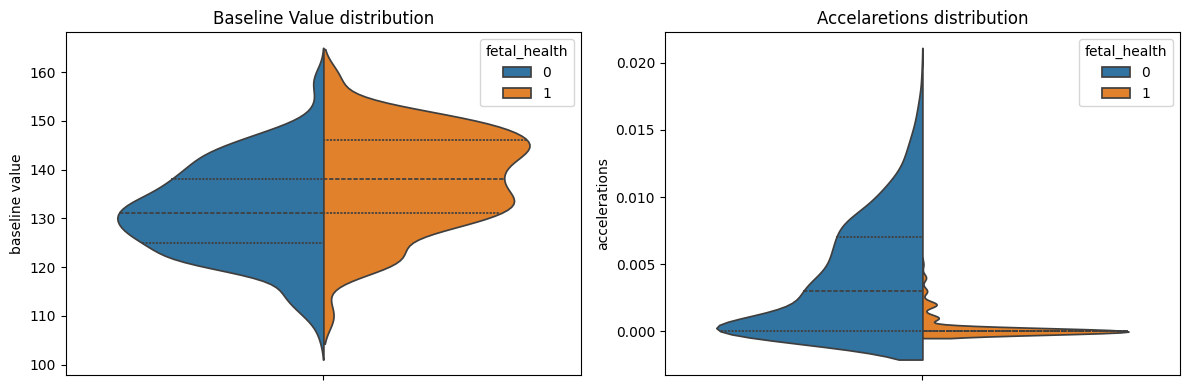

In [35]:
# Density distribution with sns.kdeplot
fig, axes = plt.subplots(1,2,figsize=(12,4))

for idx, var in enumerate(list(var_title_dict.keys())):
    sns.violinplot(data=df, y=var, ax=axes[idx], hue='fetal_health', split=True, inner='quart')
    axes[idx].set_title(var_title_dict[var])

fig.tight_layout()
plt.show()

#### Heatmap

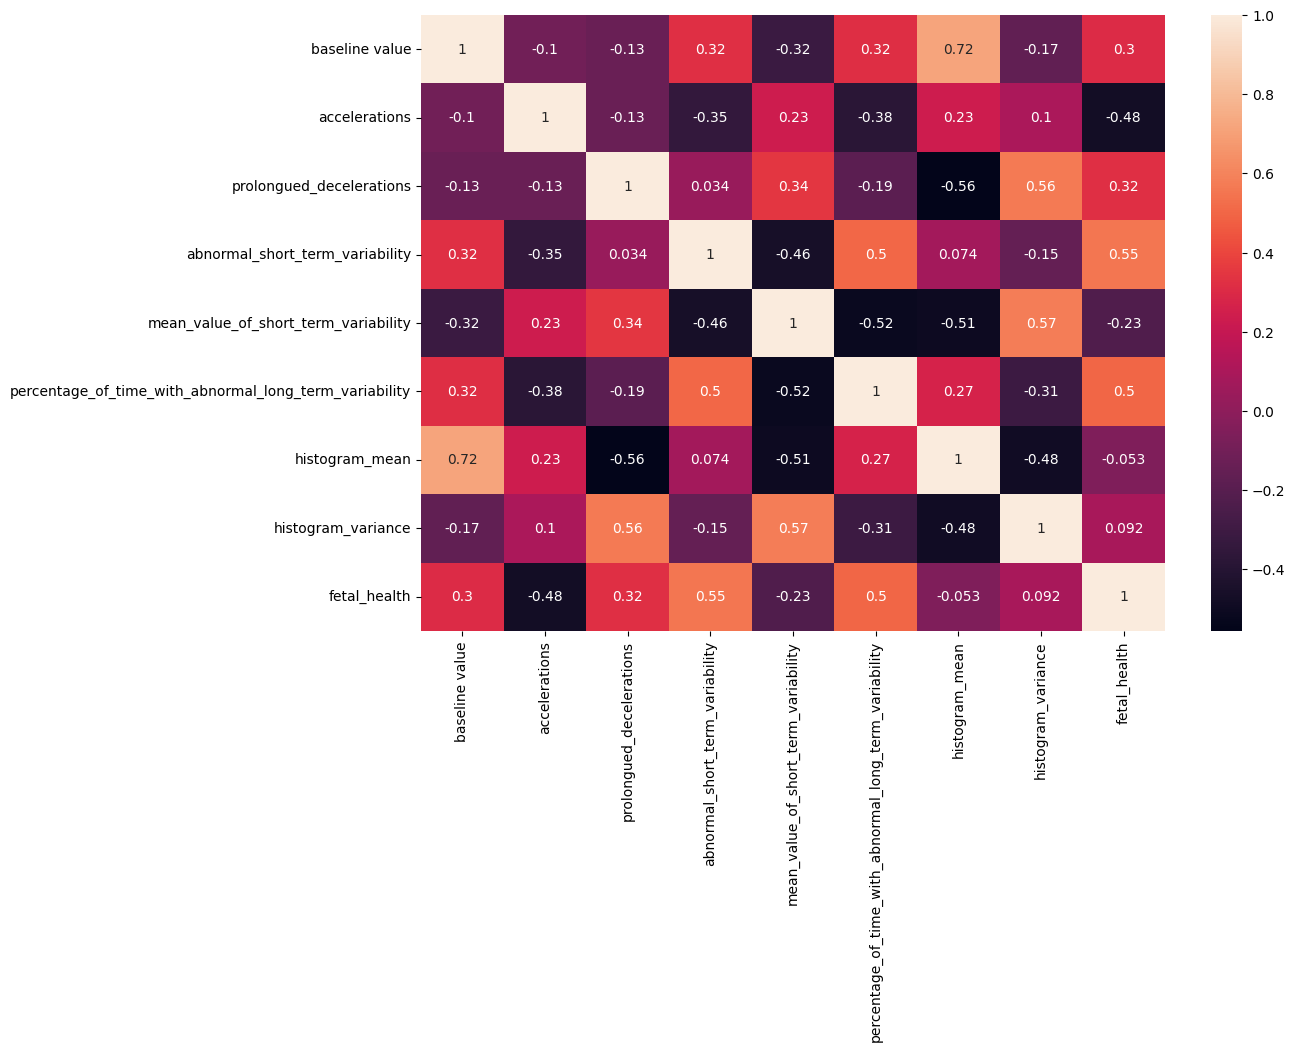

In [265]:
# Correlation heatmap with sns.heatmap
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cbar=True)

# Show the plot
plt.show()


#### Scaling the Dataset

##### From the previous statistical description of dataset it is visiable that columns of the dataset has and wide range of data which might cost in training so it would be better to scale the data to have a mean close to 0 and standard deviation close to 1. A scaling process is given below and the mean and standard deviation of the standardized dataset is also shown with some plot.

In [64]:
# ===================
# Scaling the dataset
# ===================
# Taking all the columns with the target variable
X = df.drop(columns=['fetal_health'])
X_mean2 = np.mean(X, axis=0)
X_std2 = np.std(X, axis=0, ddof=1)


X_sc = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)

# Concatenating the Scaled dataset with tarrget variable
df_scaled = pd.concat([X_sc, df['fetal_health']], axis=1)

##### In the below is is visible that mean and variable are close to 0 and 1 repespectively.

In [65]:
df_scaled.describe()

baseline value  accelerations  prolongued_decelerations  \
count    1.290000e+03   1.290000e+03              1.290000e+03   
mean    -1.542263e-16  -4.406467e-17             -2.203233e-17   
std      1.000000e+00   1.000000e+00              1.000000e+00   
min     -2.761070e+00  -7.218948e-01             -3.210984e-01   
25%     -6.804752e-01  -7.218948e-01             -3.210984e-01   
50%     -8.601944e-02  -4.502366e-01             -3.210984e-01   
75%      8.056642e-01   3.647380e-01             -3.210984e-01   
max      2.589032e+00   4.439611e+00              6.628850e+00   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                     1.290000e+03                          1.290000e+03   
mean                     -4.406467e-17                         -2.203233e-17   
std                       1.000000e+00                          1.000000e+00   
min                      -2.124778e+00                         -1.177241e+00   
25%                      -8.867891e-01                         -7.406932e-01   
50%                       1.823831e-01                         -1.950083e-01   
75%                       7.451052e-01                          4.598136e-01   
max                       2.095638e+00                          6.134937e+00   

       percentage_of_time_with_abnormal_long_term_variability  histogram_mean  \
count                                       1.290000e+03         1.290000e+03   
mean                                       -2.203233e-17        -5.397922e-16   
std                                         1.000000e+00         1.000000e+00   
min                                        -6.008398e-01        -3.557811e+00   
25%                                        -6.008398e-01        -5.824158e-01   
50%                                        -6.008398e-01         1.176771e-01   
75%                                         2.073806e-01         7.010879e-01   
max                                         3.725516e+00         2.801367e+00   

       histogram_variance  fetal_health  
count        1.290000e+03   1290.000000  
mean         7.160508e-17      0.362016  
std          1.000000e+00      0.480770  
min         -6.083499e-01      0.000000  
25%         -5.774850e-01      0.000000  
50%         -4.231604e-01      0.000000  
75%          1.324081e-01      1.000000  
max          7.694313e+00      1.000000

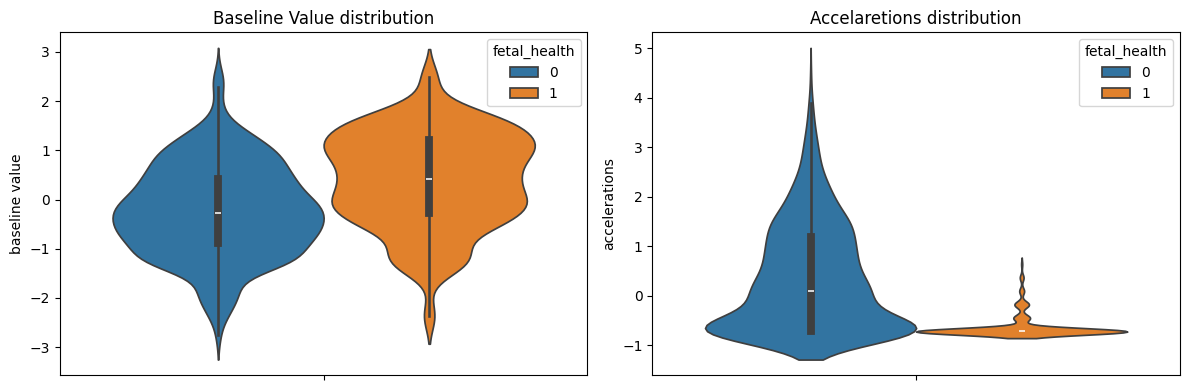

In [70]:
# =====================================
# Density distribution with sns.kdeplot
# =====================================
fig, axes = plt.subplots(1,2,figsize=(12,4))

for idx, var in enumerate(list(var_title_dict.keys())):
    sns.violinplot(data=df_scaled, y=var, ax=axes[idx], hue='fetal_health')
    axes[idx].set_title(var_title_dict[var])

fig.tight_layout()
plt.show()

##### Plot above is show that data is standardized with keeping thre exact distribustion after scaling.

#### Scatter plot Matrix

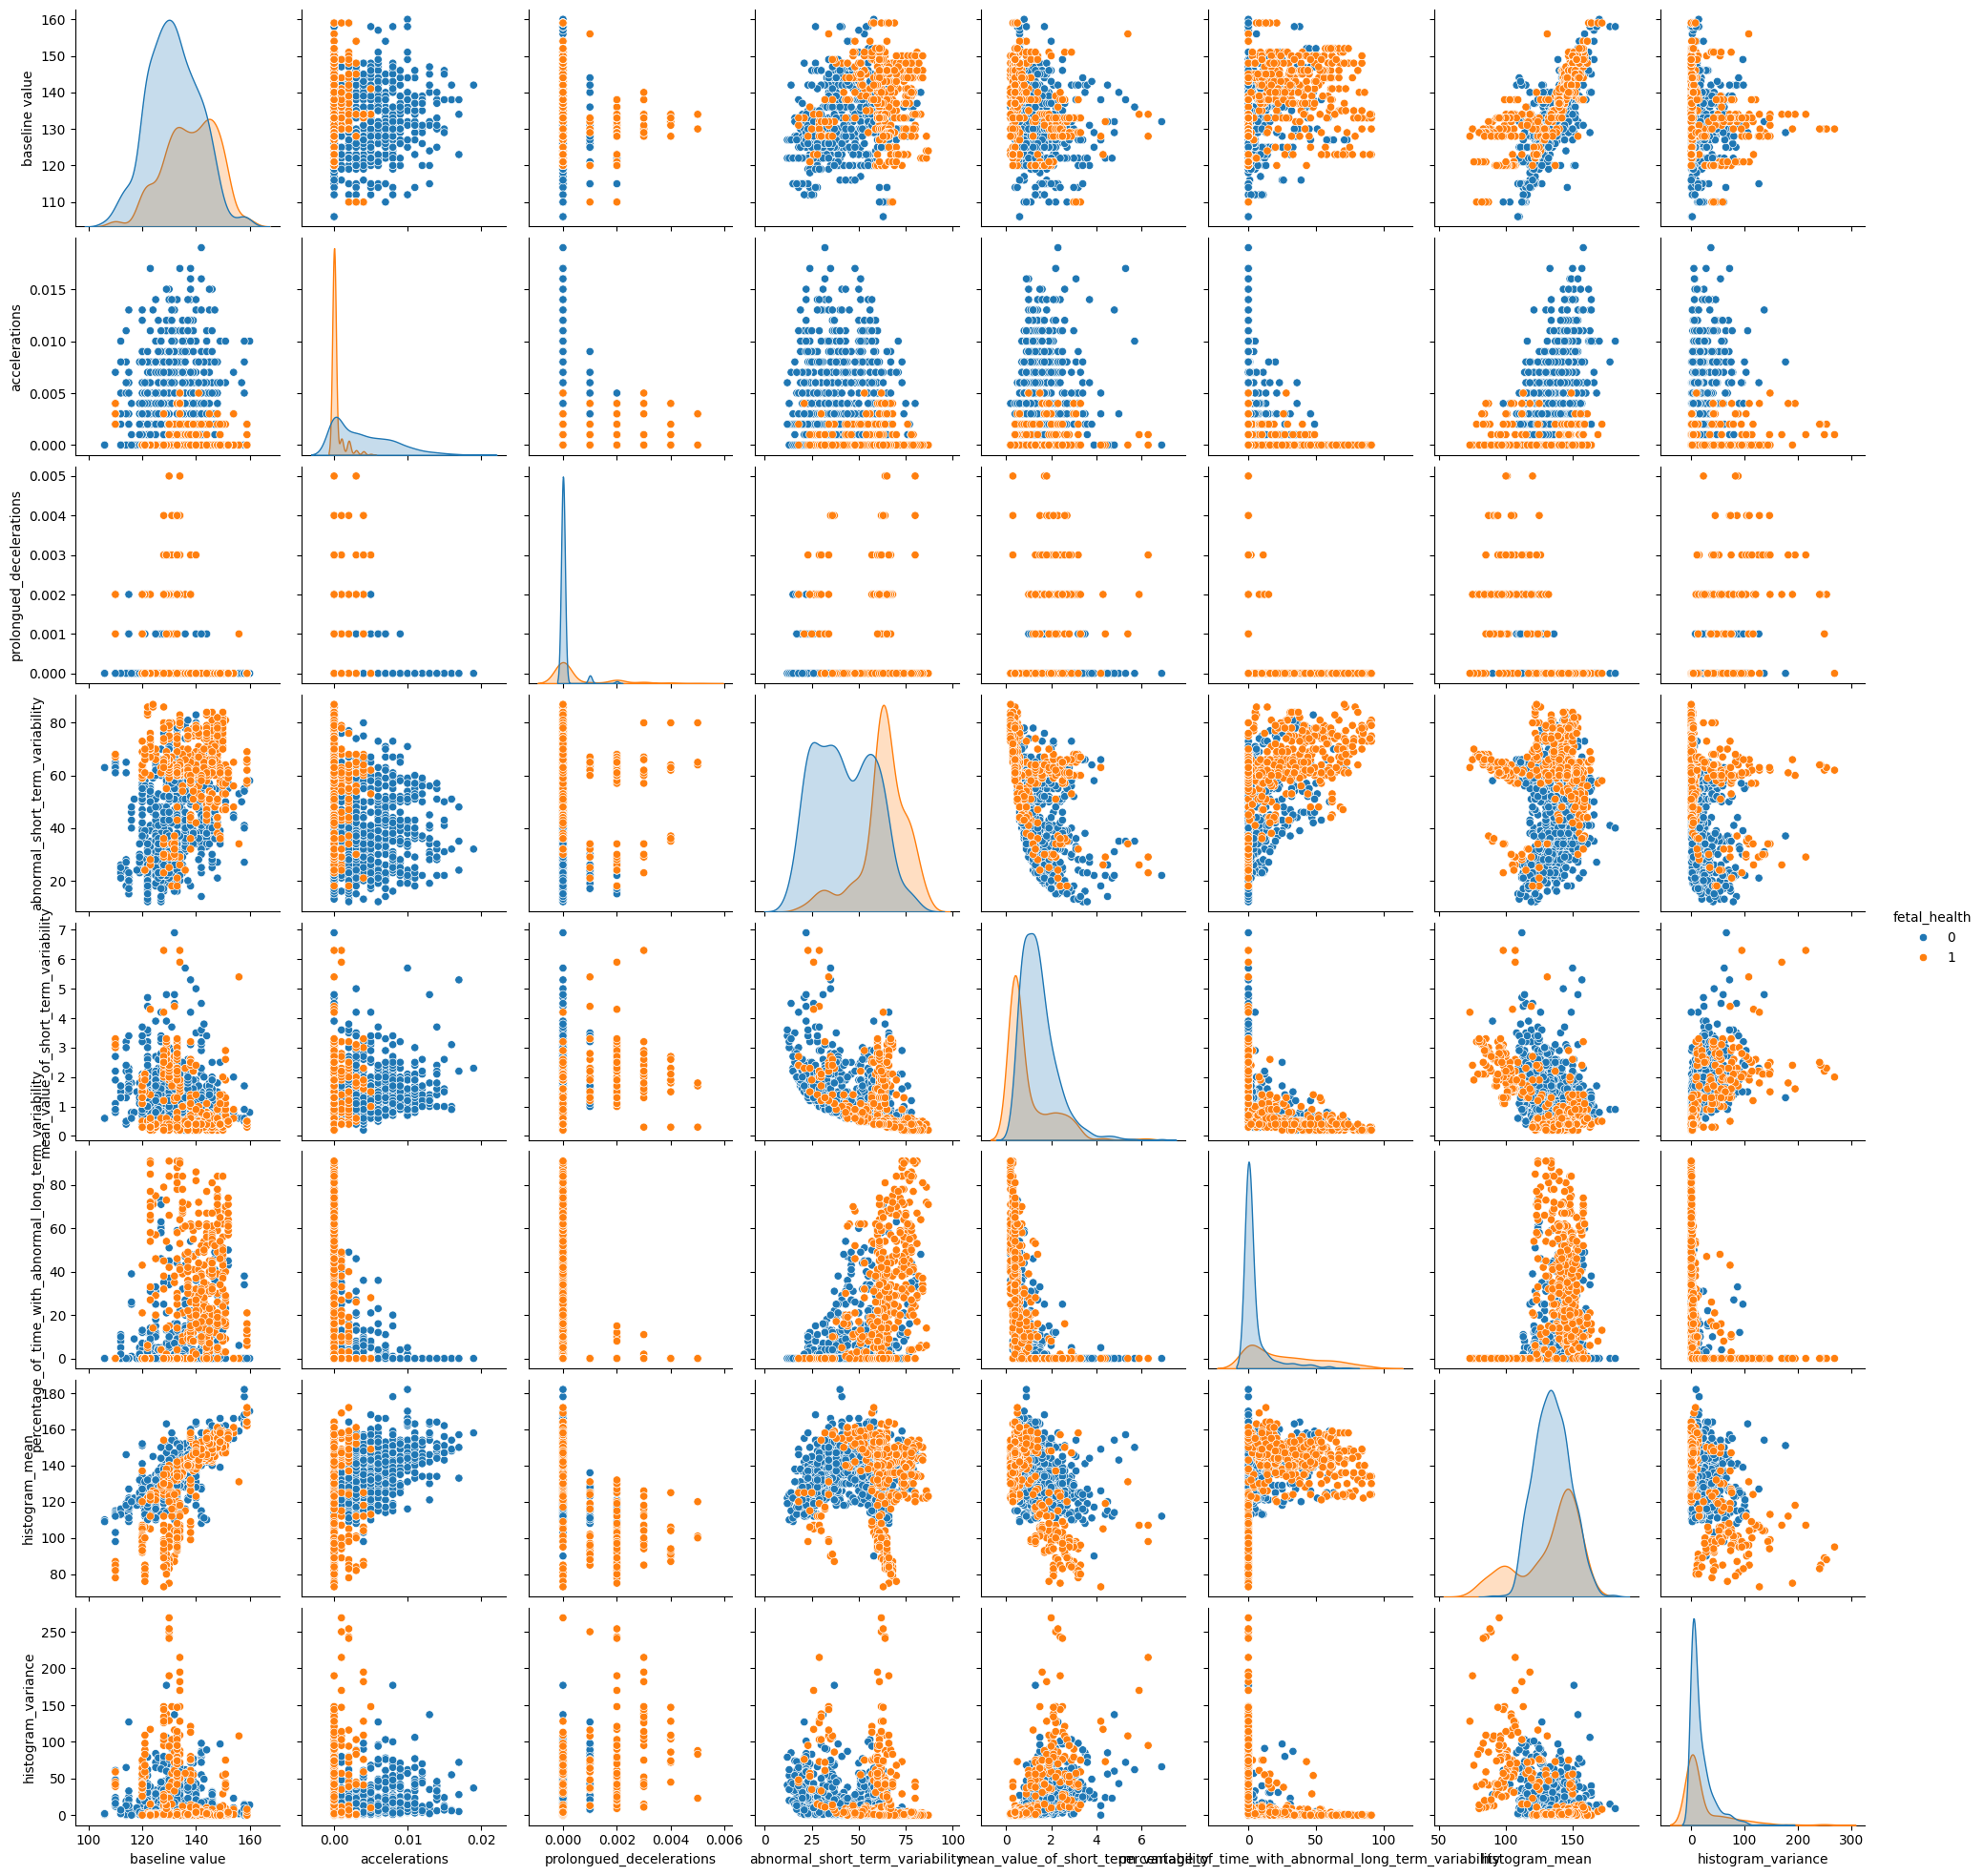

In [266]:
# With hue
sns.pairplot(df, hue="fetal_health")
plt.show()

##### In the scatter plot above it is clear that in some cases may be it is linearly separable but in most cases it is not.

## Part II: Train/Test Split

Divide your dataset into training and testing subsets. Follow these steps to create the split:

1. **Divide the dataset into two data sets, each data set only contains samples of either class 0 or class 1:**
- Create a DataFrame `df_0` containing all data with `"fetal_health"` equal to 0.
- Create a DataFrame `df_1` containing all data with `"fetal_health"` equal to 1.

2. **Split into training and test set by randomly sampling entries from the data frames:**
- Create a DataFrame `df_0_train` containing by sampling `75%` of the entries from `df_0` (use the `sample` method of the data frame, fix the `random_state` to `42`).
- Create a DataFrame `df_1_train` using the same approach with `df_1`.
- Create a DataFrame `df_0_test` containing the remaining entries of `df_0` (use `df_0.drop(df_0_train.index)` to drop all entries except the previously extracted ones).
- Create a DataFrame `df_1_test` using the same approach with `df_1`.

3. **Merge the datasets split by classes back together:**
- Create a DataFrame `df_train` containing all entries from `df_0_train` and `df_1_train`. (Hint: use the `concat` method you know from CA1)
- Create a DataFrame `df_test` containing all entries from the two test sets.

4. **Create the following data frames from these splits:**
- `X_train`: Contains all columns of `df_train` except for the target feature `"fetal_health"`
- `X_test`: Contains all columns of `df_test` except for the target feature `"fetal_health"`
- `y_train`: Contains only the target feature `"fetal_health"` for all samples in the training set
- `y_test`: Contains only the target feature `"fetal_health"` for all samples in the test set

5. **Check that your sets have the expected sizes/shape by printing number of rows and colums ("shape") of the data sets.**
- (Sanity check: there should be 8 features, almost 1000 samples in the training set and slightly more than 300 samples in the test set.)


6. **Explain the purpose of this slightly complicated procedure. Why did we first split into the two classes? Why did we then split into a training and a testing set?**


7. **What is the share (in percent) of samples with class 0 label in test and training set, and in the intial data set?**



In [115]:
# ========================================
# Spliting the dataset into Train and Test
# ========================================

# Dividing the dataset into two data sets, each data set only contains samples of either class 0 or class 1
df_0 = df.loc[df['fetal_health'] == 0]
df_1 = df.loc[df['fetal_health'] == 1]

# Spliting into training and test set by randomly sampling entries from the data frames
df_0_train = df_0.sample(frac=0.75, random_state=42)
df_1_train = df_1.sample(frac=0.75, random_state=42)
df_0_test = df_0.drop(df_0_train.index)
df_1_test = df_1.drop(df_1_train.index)

#Merging the datasets split by classes back together
df_train = pd.concat([df_0_train, df_1_train], ignore_index=True)
df_test = pd.concat([df_0_test, df_1_test], ignore_index=True)

#Creating the following data frames from these splits
X_train = df_train.drop(columns=['fetal_health'])
X_test = df_test.drop(columns=['fetal_health'])
y_train = df_train['fetal_health']
y_test = df_test['fetal_health']

In [118]:
# Checking the shape of the Datasets
print(f'Shape of the X_train: {X_train.shape}')
print(f'Shape of the X_test: {X_test.shape}')
print(f'Shape of the y_train: {y_train.shape}')
print(f'Shape of the y_train: {y_test.shape}')

Shape of the X_train: (967, 8)
Shape of the X_test: (323, 8)
Shape of the y_train: (967,)
Shape of the y_train: (323,)


##### Here the process of preparing the training and test set may seems complicated but it has nice significance as both the training and test has now have the nice ratio of from the both classes(0 and 1). This is important for example if the training of the model is done more with the data of 0 then it might predict wrong while testing.

##### For learning i.e. training a model we need to have dataset with label(for supervise learning) from which the model can extract the pattern of the data. To evaluate how good the model is working it is needed to test with new set of data which is called test data(without label). Then model predicts the label for the test dataset which is compared woith the actual label of test dataset. So, for training and testing of model it compulsory to have a two different dataset.

### Share of Sample classes

In [286]:
total = len(df)
class_0 = len(df_0)
class_1 = len(df_1)

total_train = len(df_train)
class_0_train= len(df_0_train)
class_1_train = len(df_1_train)

total_test = len(df_test)
class_0_test= len(df_0_test)
class_1_test = len(df_1_test)

In [289]:
print(f'In the whole dataset of total {total} rows percentange of Class 0 is {class_0*100/total} and Class 1 is {class_1*100/total}')
print(f'In the Train dataset of total {total_train} rows percentange of Class 0 is {class_0_train*100/total_train} and Class 1 is {class_1_train*100/total_train}')
print(f'In the Test dataset of total {total_test} rows percentange of Class 0 is {class_0_test*100/total_test} and Class 1 is {class_1_test*100/total_test}')

In the whole dataset of total 1290 rows percentange of Class 0 is 63.798449612403104 and Class 1 is 36.201550387596896
In the Train dataset of total 967 rows percentange of Class 0 is 63.805584281282314 and Class 1 is 36.194415718717686
In the Test dataset of total 323 rows percentange of Class 0 is 63.77708978328173 and Class 1 is 36.22291021671827


### Convert data to numpy arrays and shuffle the training data

Many machine learning models (including those you will work with later in the assignment) will not accept DataFrames as input. Instead, they will only work if you pass numpy arrays containing the data.
Here, we convert the DataFrames `X_train`, `X_test`, `y_train`, and `y_test` to numpy arrays `X_train`, `X_test`, `y_train`, and `y_test`.

Moreover we shuffle the training data. This is important because the training data is currently ordered by class. In Part IV, we use the first n samples from the training set to train the classifiers. If we did not shuffle the data, the classifiers would only be trained on samples of class 0.

Nothing to be done here, just execute the cell.

In [119]:
# convert to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# shuffle training data
np.random.seed(42) # for reproducibility
shuffle_index = np.random.permutation(len(X_train)) # generate random indices
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] # shuffle data by applying reordering with the random indices

## Part III: Scaling the data

1. Standardize the training _and_ test data so that each feature has a mean of 0 and a standard deviation of 1.
2. Check that the scaling was successful
    - by printing the mean and standard deviation of each feature in the scaled training set
    - by putting the scaled training set into a DataFrame and make a violin plot of the data

__Hint:__ use the `axis` argument to calculate mean and standard deviation column-wise.

__Important:__ Avoid data leakage!

__More hints:__

1. For each column, subtract the mean $(\mu)$ of each column from each value in the column
2. Divide the result by the standard deviation $(\sigma)$ of the column

(You saw how to do both operations in the lecture. If you don't remember, you can look it up in Canvas files.)

Mathematically (in case this is useful for you), this transformation can be represented for each column as follows:

$$ X_\text{scaled} = \frac{(X - \mu)}{\sigma} $$

where:
- $(X_\text{scaled})$ are the new, transformed column values (a column-vector)
- $(X)$ is the original values
- $(\mu)$ is the mean of the column
- $(\sigma)$ is the standard deviation of the column



In [240]:
# =============================================================================
# Scaling the data, both training data and test data
# =============================================================================

# Scale X_train and then scale X_test with parameters (mean & std) of X_train
X_train_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_scaled = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)    

In [241]:
# Double-check mean and std of the scaled X_train
X_train_sc_mean = np.mean(X_train_scaled, axis=0)
X_train_sc_std = np.std(X_train_scaled, axis=0, ddof=1)


# Double-check mean and std of the scaled X_test
X_test_sc_mean = np.mean(X_test_scaled, axis=0)
X_test_sc_std = np.std(X_test_scaled, axis=0, ddof=1)

In [269]:
X_train_sc_mean

array([-1.31803106e-16,  4.56925087e-15, -2.96097744e-16,  1.33869705e-16,
       -2.12543989e-17, -2.86453614e-16, -2.93342278e-16, -7.18717284e-17])

## Part IV: Training and evaluation with different dataset sizes and training times

Often, a larger dataset size will yield better model performance. (As we will learn later, this usually prevents overfitting and increases the generalization capability of the trained model.)
However, collecting data is usually rather expensive.

In this part of the exercise, you will investigate

- how the model performance changes with varying dataset size
- how the model performance changes with varying numbers of epochs/iterations of the optimizer/solver (increasing training time).

For this task (Part IV), use the `Adaline`, `Perceptron`, and `LogisticRegression` classifier from the `mlxtend` library. All use the gradient descent (GD) algorithm for training.

__Important__: Use a learning rate of `1e-4` (`0.0001`) for all classifiers, and use the argument `minibatches=1` when initializing `Adaline` and `LogisticRegression` classifier (this will make sure it uses GD). For all three classifiers, pass `random_seed=42` when initializing the classifier to ensure reproducibility of the results.

### Model training

Train the model models using progressively larger subsets of your dataset, specifically: first 50 rows, first 100 rows, first 150 rows, ..., first 650 rows, first 700 rows (in total $14$ different variants).

For each number of rows train the model with progressively larger number of epochs: 2, 7, 12, 17, ..., 87, 92, 97 (in total $20$ different model variants).

The resulting $14 \times 20 = 280$ models obtained from the different combinations of subsets and number of epochs. An output of the training process could look like this:

```
Model (1) Train a model with first 50 rows of data for 2 epochs
Model (2) Train a model with first 50 rows of data for 7 epochs
Model (3) Train a model with first 50 rows of data for 12 epochs
...
Model (21) Train a model with first 100 rows of data for 2 epochs
Model (22) Train a model with first 100 rows of data for 7 epochs
...
Model (279) Train a model with first 700 rows of data for 92 epochs
Model (280) Train a model with first 700 rows of data for 97 epochs
```

### Model evaluation

For each of the $280$ models, calculate the __accuracy on the test set__ (do __not__ use the score method but compute accuracy yourself).
Store the results in the provided 2D numpy array (it has $14$ rows and $20$ columns).
The rows of the array correspond to the different dataset sizes, and the columns correspond to the different numbers of epochs.

### Tasks
1. Train the $280$ Adaline classifiers as mentioned above and calculate the accuracy for each of the $280$ variants.
2. Generalize your code so that is doing the same procedure for all three classifiers: `Perceptron`, `Adaline`, and `LogisticRegression` after each other. Store the result for all classifiers. You can for example use an array of shape $3\times14\times20$ to store the accuracies of the three classifiers.

Note that executing the cells will take some time (but on most systems it should not be more than 5 minutes).

### Training and Evaluating the Perceptron classifier (With Unscaled Data)

In [140]:
# =====================================
# Train and evaluate all model variants
# =====================================
# Creating the arrays for different model parameters
data_size = np.arange(50, 701, 50)
epoch_size = np.arange(2, 100, 5)

# Creating a 2D array with zeros for storing accuracy
acc_ppn = np.zeros((len(epoch_size), len(data_size)))

# Looping through the each combination of row sizes and epochs sizes
for i, rows in enumerate(data_size):
    # Selecting number of rows
    X_train_new = X_train[:rows, :]
    y_train_new = y_train[:rows]
    for j, epochsNo in enumerate(epoch_size):
        # Initializing the Perceptron classifier
        ppn = Perceptron(epochs=epochsNo, eta=0.0001, random_seed=42)
        # Fitting the model
        ppn.fit(X_train_new, y_train_new)
        # Predicting on test data 
        y_pred_ppn = ppn.predict(X_test)
        # Calculating the accuracy
        acc = np.sum(np.equal(y_test, y_pred_ppn)) / len(y_test)

        acc_ppn[j, i] = acc

### Training and Evaluating the Adaline Classifier (With Unscaled Data)

In [ ]:
# Creating a 2D array with zeros for storing accuracy
acc_adaline = np.zeros((len(epoch_size), len(data_size)))

# Looping through the each combination of row sizes and epochs sizes
for i, rows in enumerate(data_size):
    # Selecting number of rows
    X_train_new = X_train[:rows, :]
    y_train_new = y_train[:rows]
    for j, epochsNo in enumerate(epoch_size):
        # Initializing the Adaline classifier
        ada = Adaline(epochs=epochsNo, eta=0.0001, minibatches=1, random_seed=42)
        # Fitting the model
        ada.fit(X_train_new, y_train_new)
        # Predicting on test data 
        y_pred_ada = ada.predict(X_test)
        # Calculating the accuracy
        acc = np.sum(np.equal(y_test, y_pred_ada)) / len(y_test)

        acc_adaline[j, i] = acc

### Training and Evaluating the Logistic Regression Classifier (With Unscaled Data)

In [261]:
# Creating a 2D array with zeros for storing accuracy
acc_lr = np.zeros((len(epoch_size), len(data_size)))

# Looping through the each combination of row sizes and epochs sizes
for i, rows in enumerate(data_size):
    # Selecting number of rows
    X_train_new = X_train[:rows, :]
    y_train_new = y_train[:rows]
    for j, epochsNo in enumerate(epoch_size):
        # Initializing the Logistic regression classifier
        lr = LogisticRegression(eta=0.0001, epochs=epochsNo, minibatches=1, random_seed=42)
        # Fitting the model
        lr.fit(X_train_new, y_train_new)
        # Predicting on test data 
        y_pred_lr = lr.predict(X_test)
        # Calculating the accuracy
        acc = np.sum(np.equal(y_test, y_pred_lr)) / len(y_test)

        acc_lr[j, i] = acc

### Generalizing the code for all the Classifiers (With Scaled Data)

In [244]:
# Creating a 2D array with zeros for storing accuracy
acc_sc = np.zeros((len(epoch_size), len(data_size)))

# Defining a function for all the classifiers
# Return : Accuracy of the classifier 
# Parameter : Algorithm (Name of the classifier)
def classifier(algorithm):
    # Looping through the each combination of row sizes and epochs sizes
    for i, rows in enumerate(data_size):
        # Selecting number of rows
        X_train_new = X_train_scaled[:rows, :]
        y_train_new = y_train[:rows]
        for j, epochsNo in enumerate(epoch_size):
            # Initializing the classifier
            if algorithm == 'LogisticRegression':
                clf = LogisticRegression(eta=0.0001, epochs=epochsNo, minibatches=1, random_seed=42)
            elif algorithm == 'Perceptron':
                clf = Perceptron(epochs=epochsNo, eta=0.0001, random_seed=42)
            else:
                clf = Adaline(epochs=epochsNo, eta=0.0001, minibatches=1, random_seed=42)
            # Fitting the model
            clf.fit(X_train_new, y_train_new)
            # Predicting on test data 
            y_pred = clf.predict(X_test_scaled)
            # Calculating the accuracy
            acc = np.sum(np.equal(y_test, y_pred)) / len(y_test)

            acc_sc[j,i] = acc
    return acc_sc

In [245]:
# Calling the classifier function
acc_lr_sc = classifier('LogisticRegression')
acc_ada_sc = classifier('Adaline')
acc_ppn_sc = classifier('Perceptron')

### Performance visualization

Plot the performance measure for all classifiers (accuracy on the test set; use the result array from above) of all the $280$ variants for each classifier in a total of three heatmaps using, for example `seaborn` or `matplotlib` directly.

The color should represent the accuracy on the test set, and the x and y axes should represent the number of epochs and the dataset size, respectively.
Which one is x and which one is y is up to you to decide. Look in the example output at the top of the assignment for inspiration for how the plot could look like and how it could be labeled nicely. (But use the correct numbers corresponding to your dataset sizes and number of epochs.)

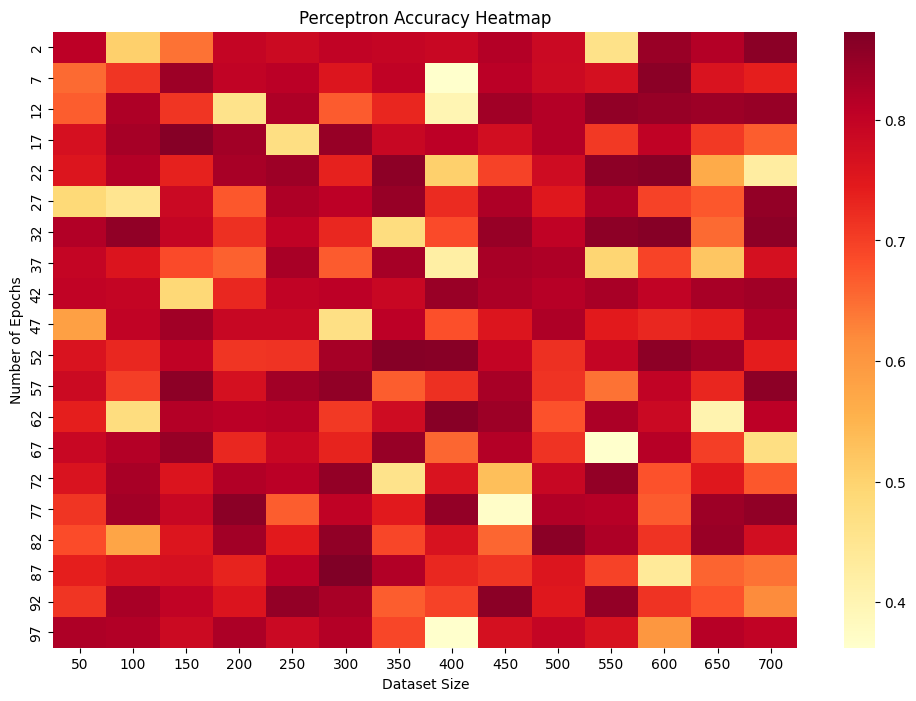

In [224]:
# ======================
# Heatmap for Perceptron
# ======================
plt.figure(figsize=(12, 8))

sns.heatmap(acc_ppn, fmt=".2f", cmap="YlOrRd",
            xticklabels=data_size, yticklabels=epoch_size)
plt.title("Perceptron Accuracy Heatmap")
plt.xlabel("Dataset Size")
plt.ylabel("Number of Epochs")
plt.show()

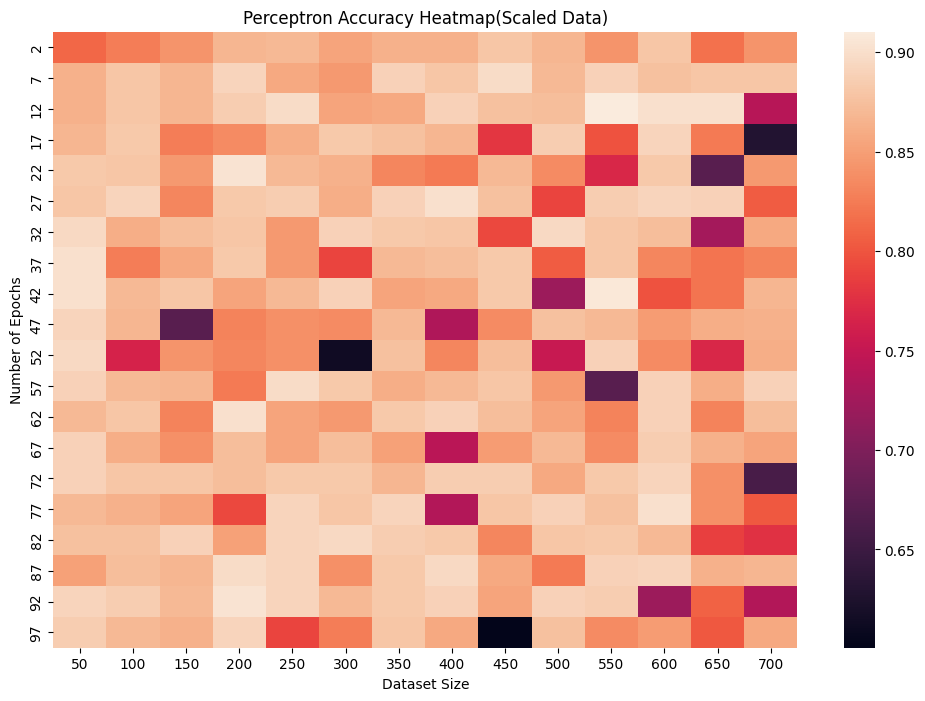

In [246]:
# ==============================
# Heatmap for Perceptron(Scaled)
# ==============================
plt.figure(figsize=(12, 8))

sns.heatmap(acc_ppn_sc,
            xticklabels=data_size, yticklabels=epoch_size)
plt.title("Perceptron Accuracy Heatmap(Scaled Data)")
plt.xlabel("Dataset Size")
plt.ylabel("Number of Epochs")
plt.show()

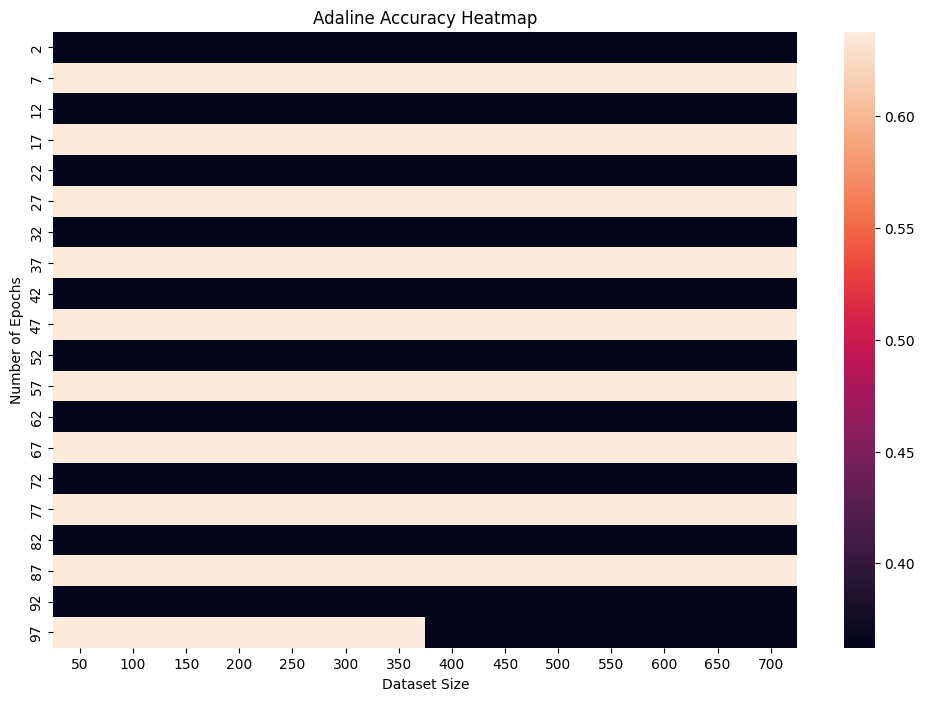

In [276]:
# ===================
# Heatmap for Adaline
# ===================
plt.figure(figsize=(12, 8))

sns.heatmap(acc_adaline,
            xticklabels=data_size, yticklabels=epoch_size)
plt.title("Adaline Accuracy Heatmap")
plt.xlabel("Dataset Size")
plt.ylabel("Number of Epochs")
plt.show()

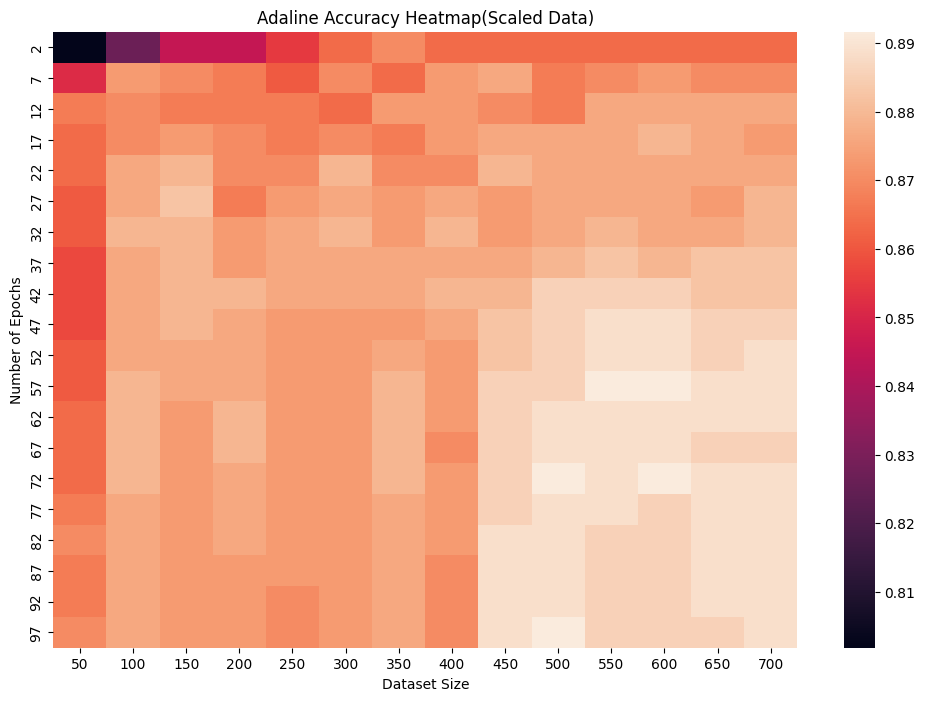

In [264]:
# ================================
# Heatmap for Adaline(Scaled Data)
# ================================
plt.figure(figsize=(12, 8))

sns.heatmap(acc_ada_sc,
            xticklabels=data_size, yticklabels=epoch_size)
plt.title("Adaline Accuracy Heatmap(Scaled Data)")
plt.xlabel("Dataset Size")
plt.ylabel("Number of Epochs")
plt.show()

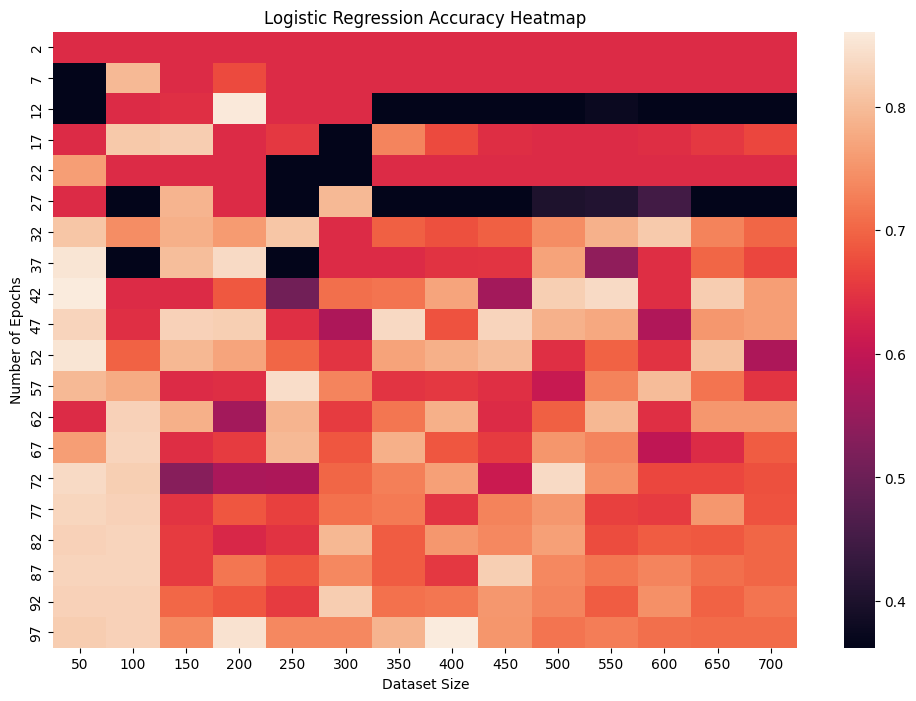

In [262]:
# ===============================
# Heatmap for Logistic Regression
# ===============================
plt.figure(figsize=(12, 8))

sns.heatmap(acc_lr,
            xticklabels=data_size, yticklabels=epoch_size)
plt.title("Logistic Regression Accuracy Heatmap")
plt.xlabel("Dataset Size")
plt.ylabel("Number of Epochs")
plt.show()

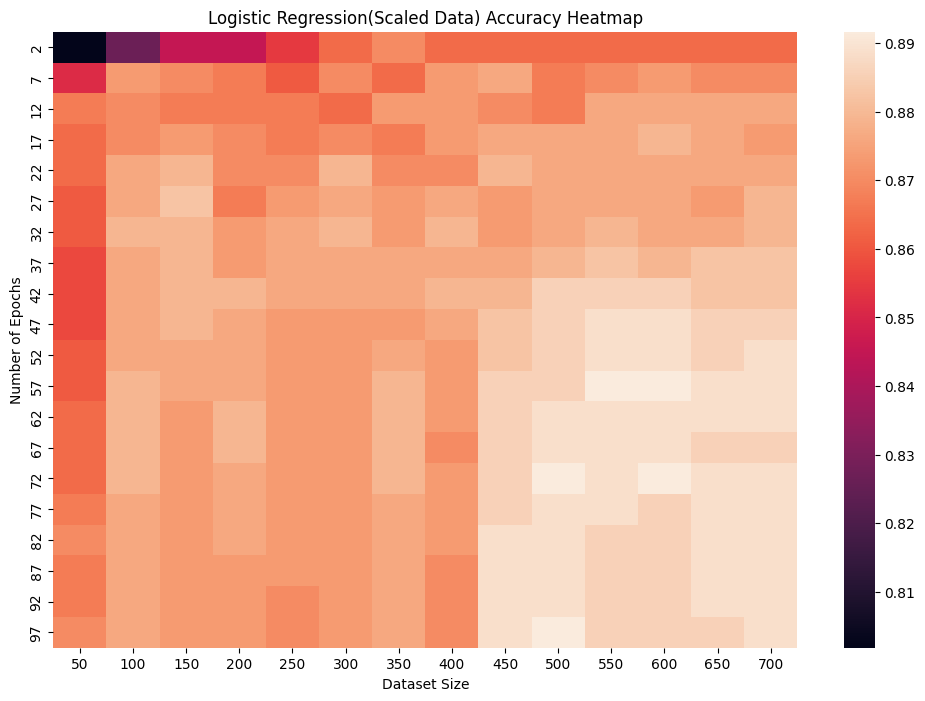

In [263]:
# =======================================
# Heatmap for Logistic Regression(Scaled)
# =======================================
plt.figure(figsize=(12, 8))

sns.heatmap(acc_lr_sc,
            xticklabels=data_size, yticklabels=epoch_size)
plt.title("Logistic Regression(Scaled Data) Accuracy Heatmap")
plt.xlabel("Dataset Size")
plt.ylabel("Number of Epochs")
plt.show()

In [278]:
acc_lr_sc

array([[0.80185759, 0.82662539, 0.84520124, 0.84520124, 0.85448916,
        0.86377709, 0.86996904, 0.86377709, 0.86377709, 0.86377709,
        0.86377709, 0.86377709, 0.86377709, 0.86377709],
       [0.85139319, 0.87306502, 0.86996904, 0.86687307, 0.86068111,
        0.86996904, 0.86377709, 0.87306502, 0.87616099, 0.86687307,
        0.86996904, 0.87306502, 0.86996904, 0.86996904],
       [0.86687307, 0.86996904, 0.86687307, 0.86687307, 0.86687307,
        0.86377709, 0.87306502, 0.87306502, 0.86996904, 0.86687307,
        0.87616099, 0.87616099, 0.87616099, 0.87616099],
       [0.86377709, 0.86996904, 0.87306502, 0.86996904, 0.86687307,
        0.86996904, 0.86687307, 0.87306502, 0.87616099, 0.87616099,
        0.87616099, 0.87925697, 0.87616099, 0.87306502],
       [0.86377709, 0.87616099, 0.87925697, 0.86996904, 0.86996904,
        0.87925697, 0.86996904, 0.86996904, 0.87925697, 0.87616099,
        0.87616099, 0.87616099, 0.87616099, 0.87616099],
       [0.86068111, 0.87616099, 0.8

# Part V: Some more plotting

For the following cell to execute you need to have the variable `X_test_scaled` with all samples of the test set and the variable `y_test` with the corresponding labels.
Complete at least up until Part III. Executing the cell will plot something.

1. Add code comments explaining what the lines are doing
2. What is the purpose of the plot?
3. Describe all components of the subplot and then comment in general on the entire plot. What does it show? What does it not show?

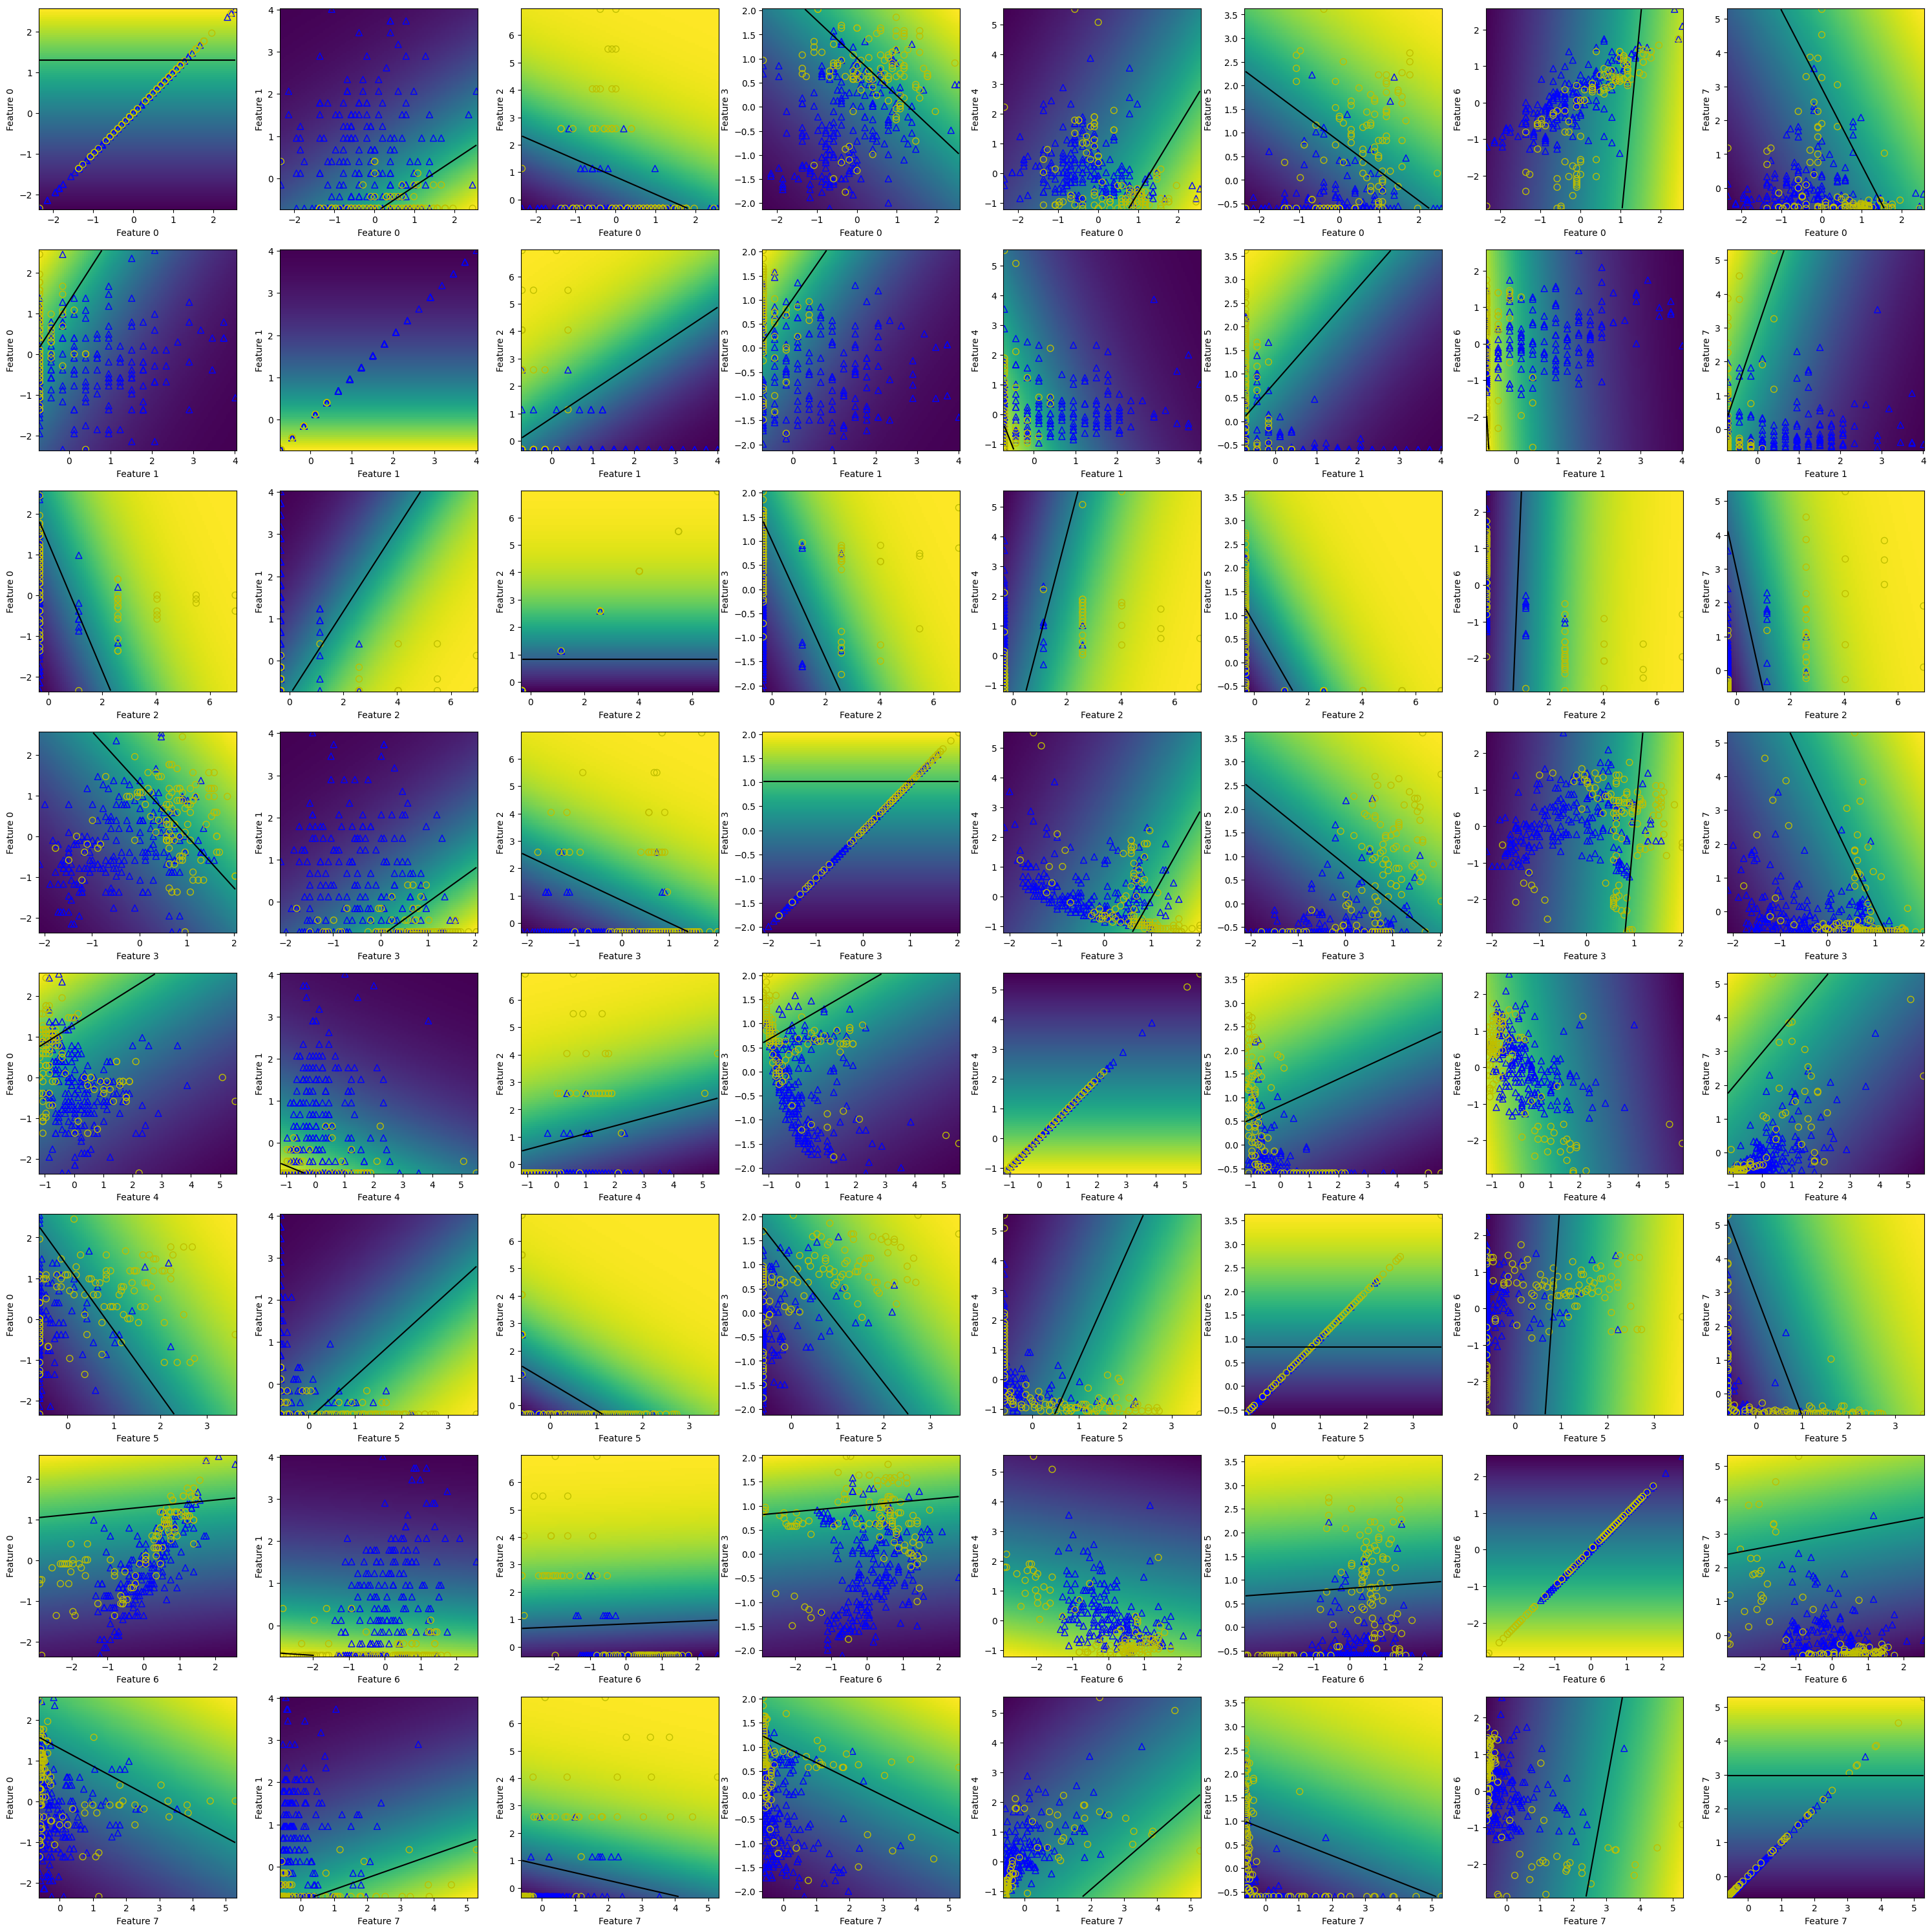

In [203]:
# Train and a logistic regression model with 300 epochs and learning rate 0.0001
clf = LogisticRegression(eta = 0.0001, epochs = 300, minibatches=1, random_seed=42)
# Fitting the model
clf.fit(X_test_scaled, y_test)

# Defining figure size and axes
fig, axes = plt.subplots(8, 8, figsize=(30, 30))
# Looping with the range of 0 to 8 for drawing plots for all the 8 features of the 
# dataset (Using 2 for loops as it is gonna 8*8 plots for each feature)
for i in range(0, 8):
    for j in range(0, 8):
        # Selecting all other features(j) with respect to the one feature(i)
        feature_1 = i
        feature_2 = j
        ax = axes[i, j]
        
        # Setting x and y label as the feature name
        ax.set_xlabel(f"Feature {feature_1}")
        ax.set_ylabel(f"Feature {feature_2}")

        # Taking the minimum and maximum for all feature of the dataset
        mins = X_test_scaled.min(axis=0)
        maxs = X_test_scaled.max(axis=0)

        # Generating 100 points between the minimum and maximum values of both the feature.
        x0 = np.linspace(mins[feature_1], maxs[feature_1], 100)
        x1 = np.linspace(mins[feature_2], maxs[feature_2], 100)

        # Creating the Grid for plotting
        X0, X1 = np.meshgrid(x0, x1)
        
        # Combining both the feature's gridpoint and making the all possible pairs
        X_two_features = np.c_[X0.ravel(), X1.ravel()]

        # Declaring the test dataset for testing according to the each pair pf gridvalue X0 and X1 
        X_plot = np.zeros(shape=(X_two_features.shape[0], X_test_scaled.shape[1]))
        X_plot[:, feature_1] = X_two_features[:, 0]
        X_plot[:, feature_2] = X_two_features[:, 1]

        # Testing the model on the Dataset
        y_pred = clf.predict_proba(X_plot)
        Z = y_pred.reshape(X0.shape)

        # Plotting with the decition boundary
        ax.pcolor(X0, X1, Z)
        ax.contour(X0, X1, Z, levels=[0.5], colors='k')
        ax.scatter(X_test_scaled[y_test == 0, feature_1], X_test_scaled[y_test == 0, feature_2], color="b", marker="^", s=50, facecolors="none")
        ax.scatter(X_test_scaled[y_test == 1, feature_1], X_test_scaled[y_test == 1, feature_2], color="y", marker="o", s=50, facecolors="none")

fig.tight_layout()
plt.show()

##### This plot is showing the performance on logistic regression for the each pair of features. Here, this can be compared(not exactly) to the distribution of the scatter plot we plotted before but now this is done for the test dataset and a decision boundary is drwan to to separate the class label 0 and 1.

##### From this plot it is possible to get the distribution the features and how they are interacting according to the different classes along with the decision boundary.
##### Although which feature is important or not can not be seen from this plot.

## Part VI: Additional discussion

### Part I:
1. What kind of plots did you use to visualize the raw data, and why did you choose these types of plots?
Answer: I used the histogram plots for seeing the distribution of the data along with box plots to the outliers alonng with the interquantile range. Then I plotted a heatmap to show the correlation between all the features and a scatter plot is also shown for the understanding the feature distribution according to the class label.

### Part II:
1. What happens if we don't shuffle the training data before training the classifiers like in Part IV?
Answer: If we don't shuffle it might train the model at the beginning with the same class label which might result into the wrong prediction.
2. How could you do the same train/test split (Point 1.-4.) using scikit-learn?
Answer: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42, stratify=y)

### Part IV:
1. How does increasing the dataset size affect the performance of the logistic regression model? Provide a summary of your findings.
Answer: With the increasing of the size of data performance of the logistic regression got better.
2. Describe the relationship between the number of epochs and model accuracy
Answer: With the increment of epochs we can see the performance also got better as the with increment of epochs model trained better.
3. Which classifier is much slower to train and why do you think that is?
Answer: Perceptron is the slowest one because it updates weights immediately after a misclassification. Updates happen multiple times during a full set of iterations(epoch).(This taken from class note)
4. One classifier shows strong fluctuations in accuracy for different dataset sizes and number of epochs. Which one is it and why do you think this happens?
Answer: Perceptron shows the fluctuation in accuacy for different dataset sizes and number of epochs. This happened because of overfitting and as the dataset is not linearly separable it convergered to unstable solution.